In [2]:
# laoding mnist

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [3]:
import numpy as np
mnist.target = mnist.target.astype(np.int64)


In [10]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [11]:
# training it on a random forest classifir

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [13]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 3.77s


In [14]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)

print(y_pred.shape)
print(y_test.shape)
accuracy_score(y_test, y_pred)

(10000,)
(10000,)


0.9492

In [15]:
# now we will use PCA to reduce the dataset dimensionality 
# with explained variance ratio of 95

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [16]:
# no training a new random forest on reduced dataset

rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [17]:
print("Training took: ", t1-t0)

# trianing is twice slower now 
# it depends on algorithm and kind of dataset

Training took:  8.309145450592041


In [18]:
# evaluation of classifier on test set

X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

# performance drop slightly when reducing dimensionality

0.9009

In [20]:
# using softmax regression

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
print(t1-t0)

12.838773250579834


In [22]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# softmax took much longer to train

0.9255

In [23]:
# using PCA with softmax

log_clf2=LogisticRegression(multi_class="multinomial", solver="lbfgs",random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print(t1-t0)

# we see a 4x speedup

4.598066329956055


C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [24]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

# so pca can give sppedup but not always

0.9201

## MNIST dataset reduced by t-SNE to two dimensions

In [26]:
# reducing the nuber of images to 10000 images

np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [28]:
# using t-SNE to reduce the dimensiona to 2D 
# to plot the dataset

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = btsne.fit_transform(X)

In [30]:
X_reduced[:5]

array([[ 70.91189 ,  36.388123],
       [-36.136814, -31.183315],
       [  9.121369, -21.899513],
       [ 34.8717  ,  33.186237],
       [-31.372345, -42.345116]], dtype=float32)

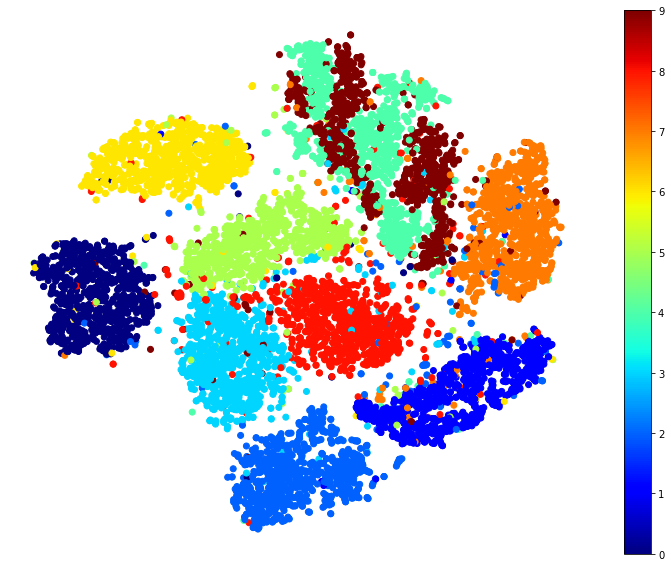

In [33]:
#using matplotlib scatter() funciton to plot scatter plot with different
#color for each digit
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

# plot tells which number a re easily distinguishable

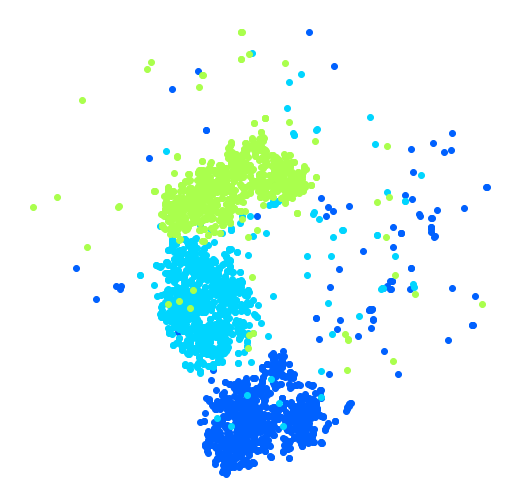

In [37]:
# focusing on just 3 and 5 which seem to overlap
import matplotlib as mpl

plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_reduced[y==digit,0],X_reduced[y==digit,1],c=[cmap(digit / 9)])
plt.axis('off')
plt.show()